In [15]:
%matplotlib notebook

# Gráficos avançados

Nesta aula, veremos como fazer alguns gráficos específicos do domínio da Oceanografia e da Biologia.

## Diagrama TS

Vamos elaborar um diagrama TS com o auxílio do pacote gsw [https://pypi.python.org/pypi/gsw/3.0.3], que é uma alternativa em python para a toolbox gsw do MATLAB:

In [12]:
import gsw

Se você conseguiu executar o comando acima, pode dar uma olhada no notebook [Diagrama TS.ipynb](../exemplo_6/Diagrama TS.ipynb)

## Rosa dos Ventos

Para fazermos gráficos estilo "Rosa dos Ventos", podemos usar o pacote windrose https://pypi.python.org/pypi/windrose/

Alguns exemplos tirados do site do projeto:

In [13]:
from windrose import WindroseAxes

#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

import matplotlib.cm as cm
import numpy as np

# Create wind speed and direction variables

ws = np.random.random(500) * 6
wd = np.random.random(500) * 360

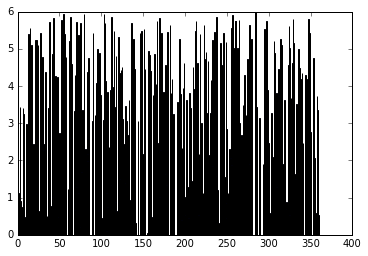

In [14]:
fig = plt.figure()
plt.bar(wd, ws)
plt.show()

<IPython.core.display.Javascript object>


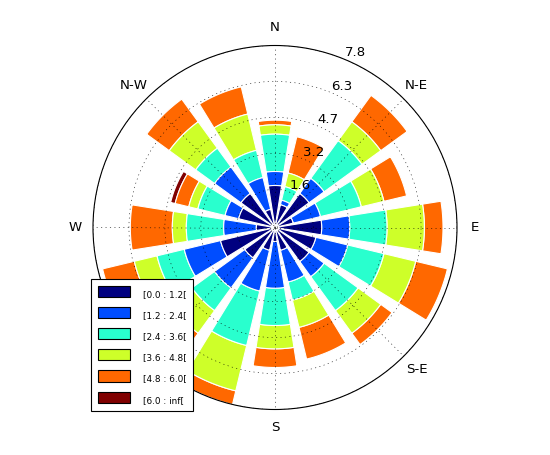

In [16]:
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

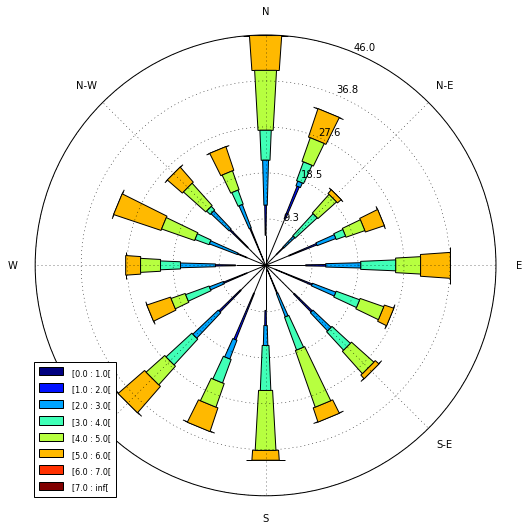

In [10]:
ax = WindroseAxes.from_ax()
ax.box(wd, ws, bins=np.arange(0, 8, 1))
ax.set_legend()

<IPython.core.display.Javascript object>


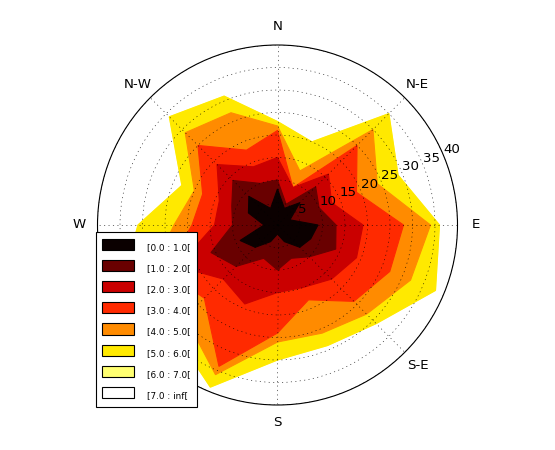

In [17]:
ax = WindroseAxes.from_ax()
ax.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)
ax.set_legend()

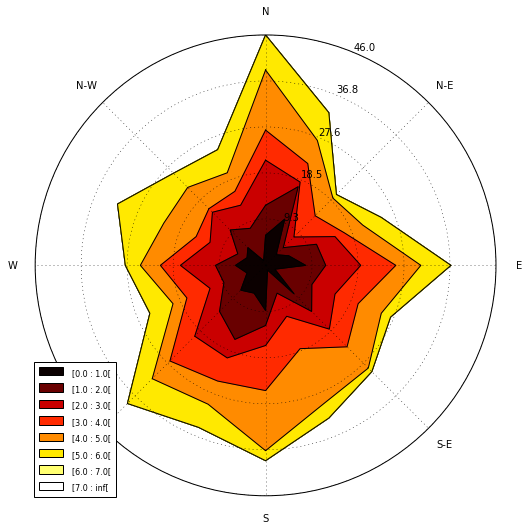

In [12]:
ax = WindroseAxes.from_ax()
ax.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)
ax.contour(wd, ws, bins=np.arange(0, 8, 1), colors='black')
ax.set_legend()

<IPython.core.display.Javascript object>


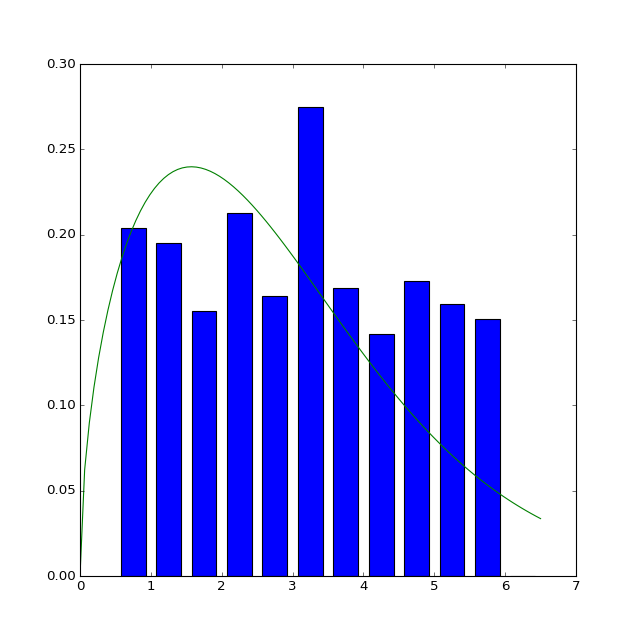

In [18]:
from windrose import WindAxes
ax = WindAxes.from_ax()
bins = np.arange(0, 6 + 1, 0.5)
bins = bins[1:]
ax, params = ax.pdf(ws, bins=bins)

## Campos vetoriais

Observe alguns exemplos deste link: https://www.getdatajoy.com/examples/python-plots/vector-fields

In [21]:
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import numpy as np

Inicialmente, usamos o comando mgrid() para criar uma malha de pontos onde queremos desenhar o gráfico final.

In [22]:
#Y, X = np.mgrid[-3:3:15j, -3:3:15j]
x = np.linspace(-3,3,15)
Y, X = np.meshgrid(x,x)
print(np.transpose(X))
X = np.transpose(X)
Y = np.transpose(Y)

[[-3.         -2.57142857 -2.14285714 -1.71428571 -1.28571429 -0.85714286
  -0.42857143  0.          0.42857143  0.85714286  1.28571429  1.71428571
   2.14285714  2.57142857  3.        ]
 [-3.         -2.57142857 -2.14285714 -1.71428571 -1.28571429 -0.85714286
  -0.42857143  0.          0.42857143  0.85714286  1.28571429  1.71428571
   2.14285714  2.57142857  3.        ]
 [-3.         -2.57142857 -2.14285714 -1.71428571 -1.28571429 -0.85714286
  -0.42857143  0.          0.42857143  0.85714286  1.28571429  1.71428571
   2.14285714  2.57142857  3.        ]
 [-3.         -2.57142857 -2.14285714 -1.71428571 -1.28571429 -0.85714286
  -0.42857143  0.          0.42857143  0.85714286  1.28571429  1.71428571
   2.14285714  2.57142857  3.        ]
 [-3.         -2.57142857 -2.14285714 -1.71428571 -1.28571429 -0.85714286
  -0.42857143  0.          0.42857143  0.85714286  1.28571429  1.71428571
   2.14285714  2.57142857  3.        ]
 [-3.         -2.57142857 -2.14285714 -1.71428571 -1.28571429 -0.

Agora, definimos os vetores em que estamos interessados:

In [23]:
U = -1 - np.cos(X**2 + Y)
V = 1 + X - Y
speed = np.sqrt(U**2 + V**2)
UN = U/speed
VN = V/speed

**Quiver Plot**
X e Y contém as coordenadas iniciais e UN e VN contém as coordenadas finais de cada vetor. O vetor U é usado para colorir o gráfico.

<IPython.core.display.Javascript object>


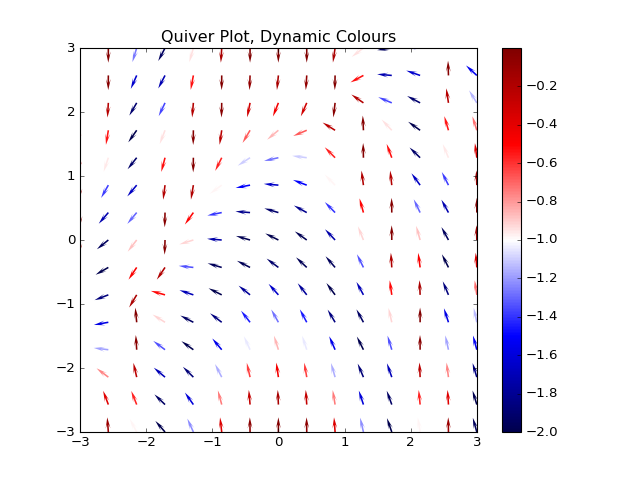

In [25]:
plot1 = plt.figure()
plt.quiver(X, Y, UN, VN,        # data
           U,                   # colour the arrows based on this array
           cmap=cm.seismic,     # colour map
           headlength=7)        # length of the arrows

plt.colorbar()                  # adds the colour bar

plt.title('Quiver Plot, Dynamic Colours')
plt.show(plot1)                 # display the plot

Para usar uma cor só:

<IPython.core.display.Javascript object>


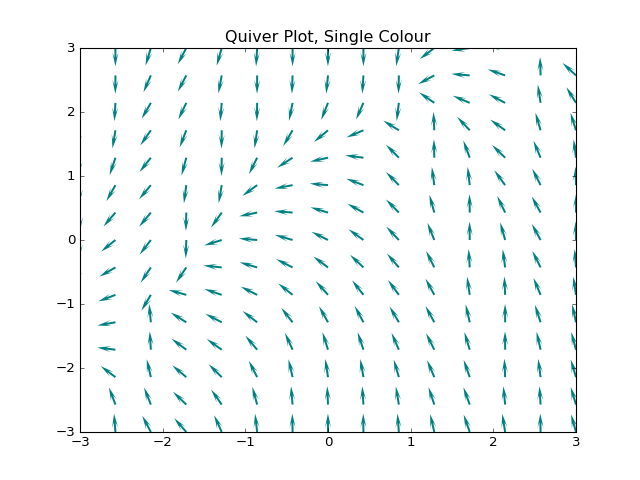

In [26]:
plot2 = plt.figure()
plt.quiver(X, Y, UN, VN, 
           color='Teal', 
           headlength=7)

plt.title('Quiver Plot, Single Colour')
plt.show(plot2)

**Stream Plot**

Agora, vamos fazer o gráfico da linha de correntes de um campo vetorial com espessura de linha fixa:

<IPython.core.display.Javascript object>


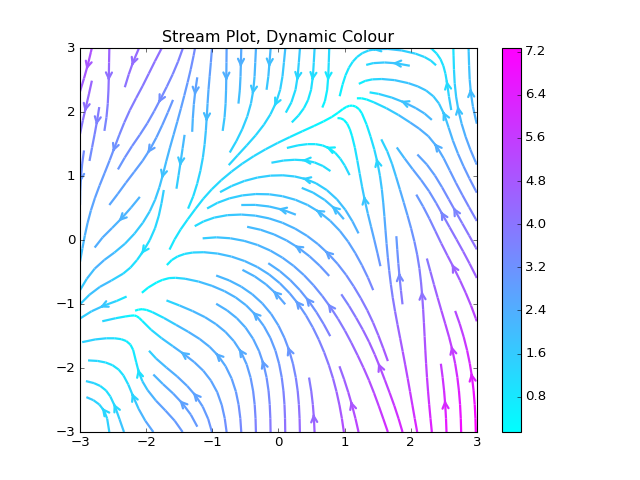

In [27]:
plot3 = plt.figure()
plt.streamplot(X, Y, U, V,          # data
               color=speed,         # array that determines the colour
               cmap=cm.cool,        # colour map
               linewidth=2,         # line thickness
               arrowstyle='->',     # arrow style
               arrowsize=1.5)       # arrow size

plt.colorbar()                      # add colour bar on the right

plt.title('Stream Plot, Dynamic Colour')
plt.show(plot3)                     # display the plot

Espessura de linhas dinâmica:

<IPython.core.display.Javascript object>


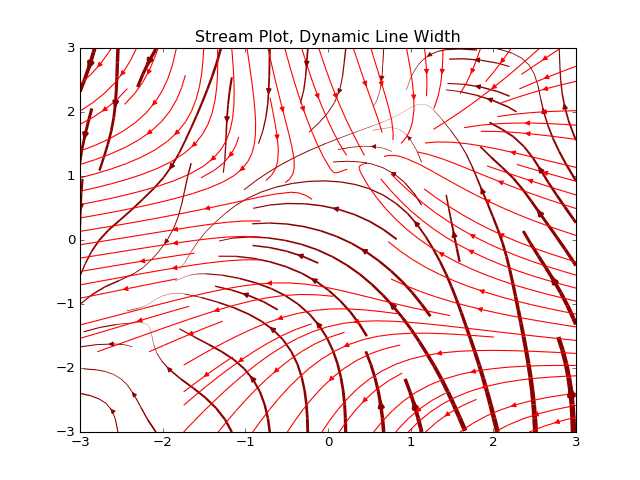

In [28]:
plot4 = plt.figure()
lw = 5*speed/speed.max()            # line width proportional to speed

plt.streamplot(X, Y, U, V,          # data
               density=[0.5, 1],
               color='DarkRed', 
               linewidth=lw)

plt.title('Stream Plot, Dynamic Line Width')
plt.show(plot4)

Acrescentar uma máscara:

In [30]:
%matplotlib inline

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:19: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/usr/lib/python3.5/site-packages/numpy/ma/core.py:812: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


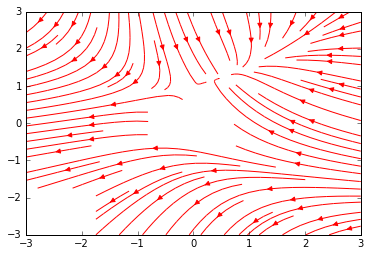

In [31]:
"""
Demo of the streamplot function with masking.

This example shows how streamlines created by the streamplot function skips
masked regions and NaN values.
"""
import numpy as np
import matplotlib.pyplot as plt

w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

mascara = np.zeros(U.shape, dtype=bool)
mascara[40:60, 40:60] = 1
U = np.ma.array(U, mask=mascara)
U[:20, :20] = np.nan

plt.streamplot(X, Y, U, V, color='r')

#plt.imshow(~mask, extent=(-w, w, -w, w), alpha=0.5,
#           interpolation='nearest', cmap=plt.cm.gray)

plt.show()

## Gráficos 3D

Agora, se você puder, utilize a opção abaixo:

In [32]:
%matplotlib notebook

Caso contrário, use o Spyder.

<IPython.core.display.Javascript object>


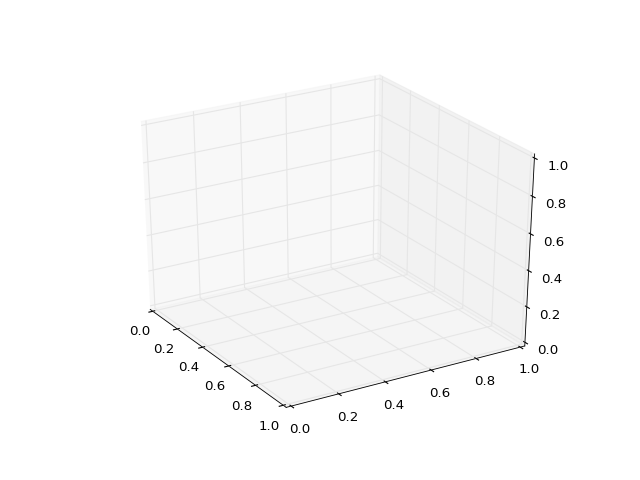

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

<IPython.core.display.Javascript object>


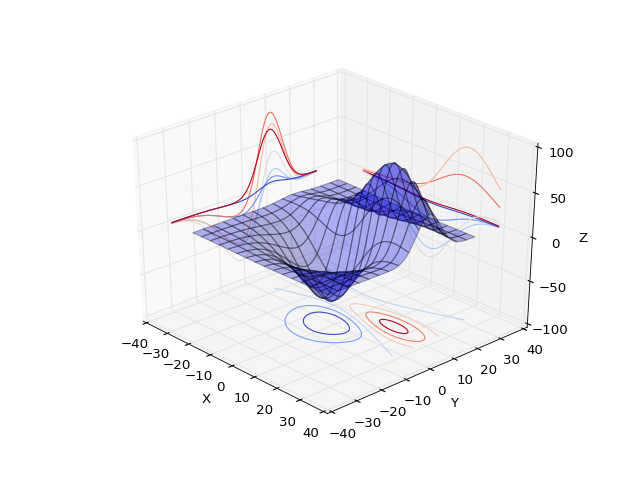

In [34]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

# A linha abaixo usa dados de teste embutidos no matplotlib. Você pode preencher com os dados que lhe interessam.
X, Y, Z = axes3d.get_test_data(0.05)

ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()


<IPython.core.display.Javascript object>


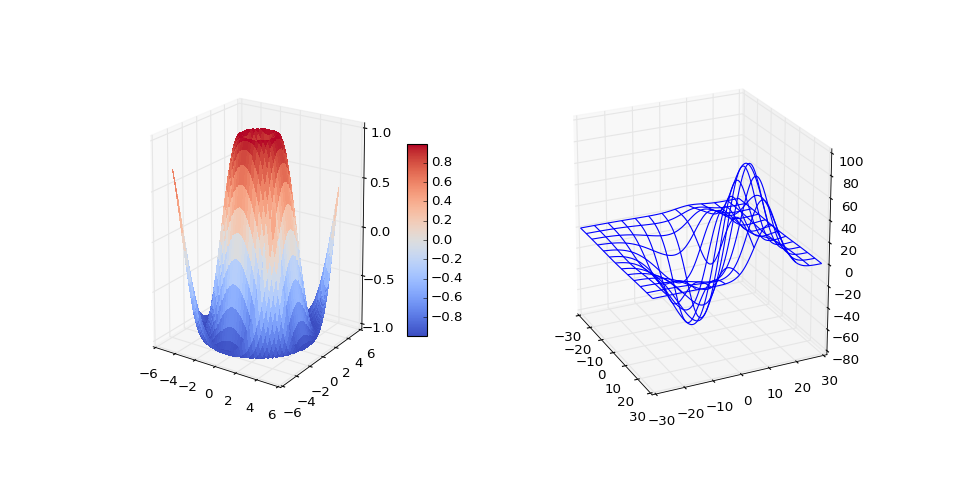

In [35]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import get_test_data
# Vamos importar também da matplotlib uma biblioteca de colormaps
from matplotlib import cm

# Apenas para acertar o tamanho do gráfico.
fig = plt.figure(figsize=plt.figaspect(0.5))

# 1o Subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01)

fig.colorbar(surf, shrink=0.5, aspect=10)

# 2o Subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# A linha abaixo usa dados de teste embutidos no matplotlib. Você pode preencher com os dados que lhe interessam.
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()


Para mais informações, visite http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

## pcolor

http://matplotlib.org/examples/pylab_examples/pcolor_demo.html

Observe o tutorial em http://matplotlib.org/users/image_tutorial.html